In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
raw_data = pd.ExcelFile('rbull1.xlsx')

In [125]:
raw_data.sheet_names

['rbull1.csv']

In [126]:
data = raw_data.parse('rbull1.csv')

In [128]:
data = data[data['clicks'] >0]

In [129]:
data['ClicksperCost'] = (data['clicks']/data['cost']).replace([np.inf, -np.inf], 0)

In [130]:
data.head()

,date,id,clicks,conversions,cost,impressions,ClicksperCost
0,2018-05-01,23842875301030600,2,1,4.360000,227,0.458716
1,2018-05-01,23842872626260600,1,0,5.520258,263,0.181151
2,2018-05-01,23842875301030600,5,2,5.340000,278,0.936330
4,2018-05-01,23842872626260600,5,1,13.080612,702,0.382245
5,2018-05-01,23842875301030600,3,0,2.530000,113,1.185771


In [132]:
opt_data = (data[['date','id','ClicksperCost']].copy(deep = True))

In [133]:
data_final = pd.pivot_table(data=opt_data, values= 'ClicksperCost', columns='id',fill_value= 0,index='date',aggfunc='sum').reset_index()
data_final.drop('date',inplace= True, axis=1)

In [134]:
data_initial_set = pd.pivot_table(data = data, values= ['clicks','conversions'], fill_value= 0, index='id',aggfunc='sum')

In [135]:
data_initial_set['TotalClicksperConversion'] = (data_initial_set['clicks']/data_initial_set['conversions']).replace([np.inf, -np.inf,np.NAN], 0)

In [136]:
data_initial_set = pd.pivot_table(data = data_initial_set, columns= 'id', values= 'TotalClicksperConversion', fill_value= 0).reset_index()

In [137]:
data_initial_set.drop('index',inplace= True,axis =1)

In [138]:
data_initial_set

id,6088935321437,6088935333637,6088935334437,6088935350037,6088935363037,6088935363237,6088935365037,6088935365837,6088935384237,6088935384437,...,23843003186420600,23843003186980600,23843003186990600,23843003187010600,23843003187020600,23843003187410600,23843003187420600,23843003187430600,23843003187440600,23843003187450600
0,5.0,6.5,0.0,2.333333,0.0,0.0,0.0,2.0,9.0,3.0,...,2.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,2.0


In [139]:
import gc
del opt_data
del raw_data
del data
gc.collect()

231631

In [140]:
len_data_final = data_final.shape[1]
df = pd.DataFrame()
appender = data_final.iloc[[0]]
while len_data_final >= 0:
    df = df.append(appender,ignore_index= True)
    len_data_final -= 1
df.shape 

(2078, 2077)

In [141]:
df = df.append(data_initial_set)
data_final = df.append(data_final)
data_final.shape

(2144, 2077)

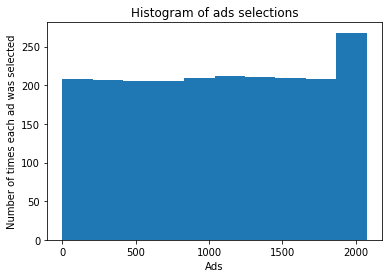

In [142]:
import random
import math
N = data_final.shape[0]
d = data_final.shape[1]
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = data_final.values[n, ad]
    if reward > 0:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward


#Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [143]:
from collections import defaultdict
id_reward_map = defaultdict()
for i, id in enumerate(data_final.columns):
    id_reward_map[id] = [i, numbers_of_rewards_0[i], numbers_of_rewards_1[i],ads_selected[i]]

In [146]:
sorted(id_reward_map.items(), key=lambda x:(x[1][3]), reverse = True)

[(23842799612670700, [1589, 1, 0, 2076]),
 (6096914660637, [1056, 1, 0, 2075]),
 (6097842887837, [1353, 1, 0, 2074]),
 (6094650895437, [282, 1, 0, 2073]),
 (23842792615810700, [1396, 1, 0, 2072]),
 (6095173569437, [326, 1, 0, 2071]),
 (6095894604437, [490, 1, 0, 2070]),
 (23842811489530700, [1827, 1, 0, 2069]),
 (6093705973037, [131, 1, 0, 2068]),
 (23842795434750700, [1499, 1, 0, 2067]),
 (6097011907437, [1155, 1, 0, 2066]),
 (6093228352237, [71, 1, 0, 2065]),
 (6093785131037, [173, 1, 0, 2064]),
 (6088935419237, [14, 2, 0, 2063]),
 (23842793657520700, [1436, 1, 0, 2062]),
 (6096390568837, [903, 1, 0, 2061]),
 (6088935442437, [16, 1, 0, 2060]),
 (6093228861437, [88, 1, 0, 2058]),
 (23842793569910700, [1410, 1, 0, 2057]),
 (6096203163837, [745, 1, 0, 2056]),
 (6096203211237, [753, 1, 0, 2054]),
 (23842811500240700, [1852, 1, 0, 2053]),
 (6097011995237, [1217, 1, 0, 2052]),
 (6096915539237, [1067, 1, 0, 2051]),
 (6097002345037, [1082, 1, 0, 2049]),
 (6097002347637, [1094, 1, 0, 2048]),


In [145]:
total_reward

363.1054226174838